In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

print(tf.__version__)
print(tf.config.list_physical_devices())
print(np.__version__)
print(pd.__version__)

2021-07-03 18:24:36.358841: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


2.5.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1.19.5
1.2.5


2021-07-03 18:24:37.036893: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-03 18:24:37.092146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-03 18:24:37.093345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0b:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2021-07-03 18:24:37.093367: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-03 18:24:37.095672: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-07-03 18:24:37.095717: I tensorflow/stream_executor/pl

# 1.2: Manipulating Data with Pandas


In [21]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

base = datetime(month=12, year=2020, day=1)
date_list = [base - relativedelta(months=x) for x in range((12 * 3) + 1)]
second_col = np.random.random(len(date_list))
third_col = np.random.random(len(date_list))
fourth_col = np.subtract(third_col, second_col)
# print(len(date_list))
data = {
    "dates": date_list,
    "second_col": second_col,
    "third_col": third_col,
    "diff": fourth_col
}
df = pd.DataFrame(data)
# df[]
df.head()

,dates,second_col,third_col,diff
0,2020-12-01,0.825721,0.258075,-0.567646
1,2020-11-01,0.366643,0.013010,-0.353633
2,2020-10-01,0.604518,0.450299,-0.154218
3,2020-09-01,0.365230,0.717719,0.352489
4,2020-08-01,0.117230,0.744520,0.627290


In [29]:
data_2018 = df[df["dates"] < datetime(year=2019, month=1, day=1)]
data_2019 = df[(datetime(year=2019, month=1, day=1) <= df["dates"]) & (df["dates"] < datetime(year=2020, month=1, day=1))]
data_2020 = df[df["dates"] >= datetime(year=2020, month=1, day=1)]

# 1.3 Creating a Neural Network to convert Celsius to Fahrenheit

In [57]:
celsius_to_fahrenheit = lambda c: (c * 1.8) + 32

X = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
y = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)
print(X[:500])
print(y[:500])

[-40. -10.   0.   8.  15.  22.  38.]
[-40.  14.  32.  46.  59.  72. 100.]


In [54]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=1))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(tf.keras.optimizers.Adam(0.1), metrics=['mean_squared_error'], loss='mean_squared_error')
history = model.fit(X, y, epochs=500, verbose=1)
print("Done Training Model")

Epoch 1/500
1/1 [==============================] - 0s 133ms/step - loss: 0.0840 - mean_squared_error: 0.0840
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 4.9690 - mean_squared_error: 4.9690
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3625 - mean_squared_error: 0.3625
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2633 - mean_squared_error: 1.2633
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 2.9116 - mean_squared_error: 2.9116
Epoch 6/500
1/1 [==================

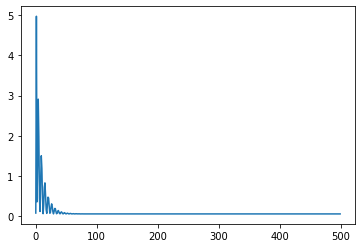

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [60]:
print(model.predict([100.0]))
print(celsius_to_fahrenheit(100.0))

[[211.74744]]
212.0
